In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
import keras

In [9]:
x = np.vstack([np.random.uniform(-1,1,10000) for _ in range(2)]).T
y=(x[:,0]**2.+x[:,1]**2.).reshape((len(x),1))
xT = np.vstack([np.random.uniform(-1,1,1000) for _ in range(2)]).T
yT=(xT[:,0]**2.+xT[:,1]**2.).reshape((len(xT),1))

In [41]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model=Sequential()
model.add(Dense(16, input_shape=(x.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(y.shape[1]))
model.compile(loss='mean_squared_error', optimizer='Adam')

model.fit(x, y, epochs=100, batch_size=16,verbose=1)
model.fit(x, y, epochs=1, batch_size=16,verbose=1)
score = model.evaluate(xT, yT, batch_size=16)

Epoch 1/100
10000/10000 [==============================] - 0s 29us/step - loss: 0.2241
Epoch 2/100
10000/10000 [==============================] - 0s 26us/step - loss: 0.0539
Epoch 3/100
10000/10000 [==============================] - 0s 26us/step - loss: 0.0148
Epoch 4/100
10000/10000 [==============================] - 0s 25us/step - loss: 0.0060
Epoch 5/100
10000/10000 [==============================] - 0s 31us/step - loss: 0.0041
Epoch 6/100
10000/10000 [==============================] - 0s 27us/step - loss: 0.0031
Epoch 7/100
10000/10000 [==============================] - 0s 32us/step - loss: 0.0023
Epoch 8/100
10000/10000 [==============================] - 0s 28us/step - loss: 0.0019
Epoch 9/100
10000/10000 [==============================] - 0s 32us/step - loss: 0.0015
Epoch 10/100
10000/10000 [==============================] - 0s 27us/step - loss: 0.0012
Epoch 11/100
10000/10000 [==============================] - 0s 24us/step - loss: 0.0010
Epoch 12/100
10000/10000 [===============

10000/10000 [==============================] - 0s 23us/step - loss: 5.5239e-04
Epoch 91/100
10000/10000 [==============================] - 0s 27us/step - loss: 5.5083e-04
Epoch 92/100
10000/10000 [==============================] - 0s 27us/step - loss: 5.4564e-04
Epoch 93/100
10000/10000 [==============================] - 0s 27us/step - loss: 5.4839e-04
Epoch 94/100
10000/10000 [==============================] - 0s 27us/step - loss: 5.4586e-04
Epoch 95/100
10000/10000 [==============================] - 0s 27us/step - loss: 5.4970e-04
Epoch 96/100
10000/10000 [==============================] - 0s 26us/step - loss: 5.4714e-04
Epoch 97/100
10000/10000 [==============================] - 0s 27us/step - loss: 5.4966e-04
Epoch 98/100
10000/10000 [==============================] - 0s 27us/step - loss: 5.5323e-04
Epoch 99/100
10000/10000 [==============================] - 0s 27us/step - loss: 5.5779e-04
Epoch 100/100
10000/10000 [==============================] - 0s 27us/step - loss: 5.4372e-04


In [42]:
pred_out=model.predict(xT)

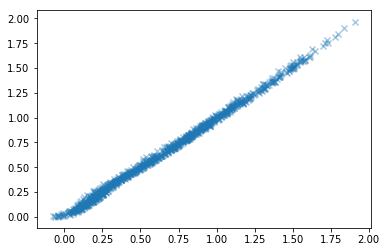

In [44]:
plt.scatter(pred_out,yT,marker='x',alpha=0.4)

In [45]:
np.mean(pred_out-yT)

0.0003286924631522577

In [46]:
# Dimensions
dim_in = x.shape[1]#trainX.shape[1]
dim_out= y.shape[1]#trainY.shape[1]

import torch
from torch.autograd import Variable

# Convert to torch variables
tr_input = Variable(torch.from_numpy(x)).type(torch.FloatTensor)
tr_output = Variable(torch.from_numpy(y), requires_grad=False).type(torch.FloatTensor)

te_input = Variable(torch.from_numpy(xT)).type(torch.FloatTensor)
te_output = Variable(torch.from_numpy(yT), requires_grad=False).type(torch.FloatTensor)


In [47]:
def one_layer_model(neurons=16):
    model = torch.nn.Sequential(
        torch.nn.Linear(dim_in,neurons),
        torch.nn.ReLU(),
        torch.nn.Linear(neurons,dim_out)
    )
    return model


In [53]:
def train_neural_network(model,epochs = 100,learning_rate = 0.1,verbose=True):
    loss_fn = torch.nn.MSELoss(reduction='elementwise_mean')

    # Use Adam optimizer with learning rate specified in parameter.py
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
    
    # For loss records
    losslog = []
    epoch = []
    
    # Train neural network
    for i in range(epochs):
        pred_output = model(tr_input)
        loss = loss_fn(pred_output, tr_output)
        optimizer.zero_grad() # Initially zero gradient
        loss.backward() # Backpropagation
        optimizer.step() # Update via optimizer
        scheduler.step(loss) # Update learning rate

        if i % 10 ==0:
            losslog.append(loss.data[0])
            epoch.append(i)
        if i % 50==0:
            if verbose:
                print("Training epoch %d of %d complete" %(i,epochs))
    
    # Convert weights to numpy arrays
    model_numpy = []
    for param in model.parameters():
        model_numpy.append(param.data.numpy())

    print("Loss value is {}".format(losslog[-1]))
    
    plt.plot(epoch,losslog,label=learning_rate)
    plt.ylabel("Loss value")
    plt.xlabel("Epoch")
    plt.title("Loss plot")
    plt.legend()
    plt.show()
    
    pred_test = model(te_input)
    loss_test = loss_fn(pred_test,te_output)
    print("Loss value is {}".format(loss_test.data[0]))
    
    return model_numpy,epoch,losslog


/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Training epoch 0 of 100 complete
Training epoch 50 of 100 complete
Loss value is 0.0021276234183460474


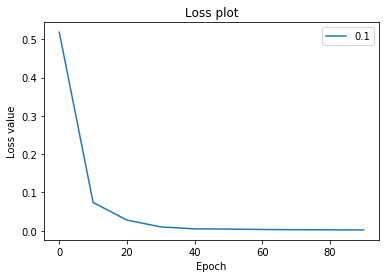

Loss value is 0.0017754858126863837


/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


In [54]:
model,_,_=train_neural_network(one_layer_model(16),epochs=100,learning_rate=0.1,verbose=True)

In [58]:
def reconstruct(model,par):
    w0=np.asmatrix(model[0]).T
    w1=np.asmatrix(model[2])
    b0=np.asmatrix(model[1]).T
    b1=np.asmatrix(model[3])
    l1=np.matmul(np.asmatrix(par),w0)+b0.T
    out=np.matmul(w1,np.maximum(l1,0).T)+b1.T
    return float(out)

In [59]:
nn_T=np.asarray([reconstruct(model,xi) for xi in xT])

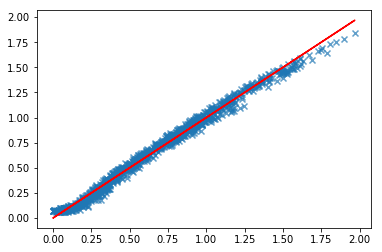

In [60]:
plt.scatter(yT,nn_T,marker='x',alpha=0.7)
plt.plot(yT,yT,c='r');

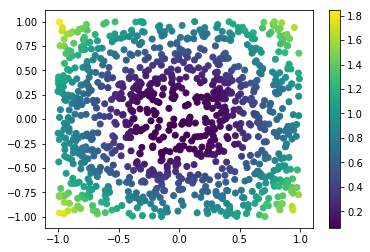

In [61]:
plt.scatter(xT[:,0],xT[:,1],c=nn_T);plt.colorbar()